# Importing libraries

In [ ]:
import numpy as np        # To perform the Mathematical operation
import pandas as pd       # Data Manipulation tool

# Data Visualisation tool
import matplotlib.pyplot as plt       
import seaborn as sns                 

# To check accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error

# For encoding and scaling 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# train_test_split <- divide train and test set
# GridSearchCV <- classifier hyper parameter tunning 
from sklearn.model_selection import train_test_split, GridSearchCV

# Classification methods 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC                         # Support vector classifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Importing the datasets

In [ ]:
train = pd.read_csv('/content/Copy of Training Data.csv')
test = pd.read_csv('/content/Copy of Testing Data.csv')

**Variables**

* Loan_ID----------------> Unique Loan ID.
* Gender ----------------> Male/ Female
* Married ---------------> Applicant married (Y/N)
* Dependents ------------> Number of dependents
* Education -------------> Applicant Education (Graduate/ Under Graduate)
* Self_Employed ---------> Self-employed (Y/N)
* ApplicantIncome -------> Applicant income
* CoapplicantIncome -----> Coapplicant income
* LoanAmount ------------> Loan amount in thousands
* Loan_Amount_Term ------> Term of a loan in months
* Credit_History --------> Credit history meets guidelines
* Property_Area ---------> Urban/ Semi-Urban/ Rural
* Loan_Status -----------> Loan approved (Y/N)

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
train.isnull().sum()
# There are null values 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

**Missing values in training set**
* Credit_History 50
* Self_Employed 32
* LoanAmount 22
* Dependents 15
* Loan_Amount_Term 14
* Gender 13
* Married 3


#Descriptive analysis

##Data visualization

*1. Applicant income*

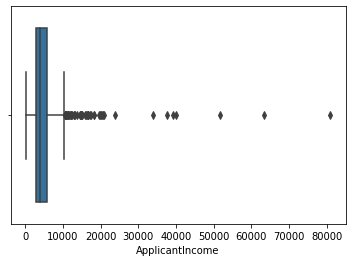

In [ ]:
sns.boxplot(x = train.ApplicantIncome)

**Applicant Income has outliers and it is right skewed. Boxplots cannot be observed clearly due to their high range. So, in order to sort it out, log transformation can be used on ApplicantIncome variable to shrink the range**

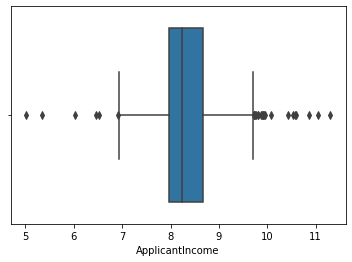

In [ ]:
sns.boxplot(x = np.log(train.ApplicantIncome))

**Even after transforming, there are outliers to be seen. But towards symmetric**

*2. Coapplicant income*

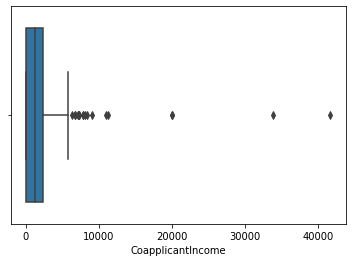

In [ ]:
sns.boxplot(x = train.CoapplicantIncome)

**CoapplicantIncome is also right skewed and with clear outliers.**

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


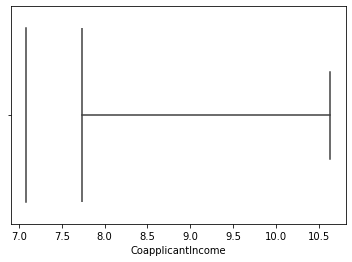

In [ ]:
sns.boxplot(x = np.log(train.CoapplicantIncome))

**Log transformation does not work.**

*3. Loan Amount*

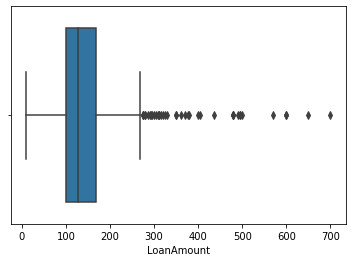

In [ ]:
sns.boxplot(x = train.LoanAmount)

**There are outliers and right skewed. So, try log transfering.**

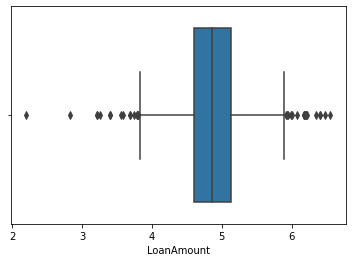

In [ ]:
sns.boxplot(x = np.log(train.LoanAmount))

**Transfered more towards normal after applying log transformation but yet with outliers.**

*4. Loan amount term*

(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <a list of 10 Patch objects>)

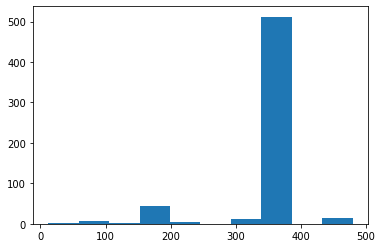

In [ ]:
plt.hist(train.Loan_Amount_Term)

*5. Correlation between numerical variables*

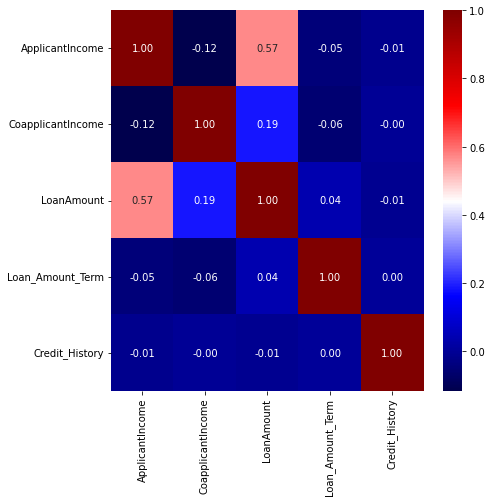

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(train.corr(), annot=True, cmap='seismic', fmt='.2f')

**Applicant income is strongly related with the Loan amount compared to other variables.**

In [ ]:
# sns.boxplot(x = train['Loan_Status'], y = train.ApplicantIncome)

In [ ]:
# Log transfered ApplicantIncome
# sns.boxplot(x = train['Loan_Status'], y = np.log(train.ApplicantIncome))

In [ ]:
# sns.boxplot(x = train['Loan_Status'], y = train.LoanAmount)

In [ ]:
# Log transfered LoanAmount
# sns.boxplot(x = train['Loan_Status'], y = np.log(train.LoanAmount))

##Q1.
1. What's the ratio of Male to Female?


In [ ]:
train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
print(train['Gender'].value_counts()[0], ':', train['Gender'].value_counts()[1])

489 : 112


##Q2.
2. How many Males are married and non-married?

In [ ]:
train[train['Gender'] == 'Male']['Married'].value_counts()

Yes    357
No     130
Name: Married, dtype: int64

In [ ]:
print('Married male', train[train['Gender'] == 'Male']['Married'].value_counts()[0])
print('Unmarried male', train[train['Gender'] == 'Male']['Married'].value_counts()[1])

Married male 357
Unmarried male 130


##Q3.
3. How many Females are married and non-married?


In [ ]:
train[train['Gender'] == 'Female']['Married'].value_counts()

No     80
Yes    31
Name: Married, dtype: int64

In [ ]:
print('Married female', train[train['Gender'] == 'Female']['Married'].value_counts()[1])
print('Unmarried female', train[train['Gender'] == 'Female']['Married'].value_counts()[0])

Married female 31
Unmarried female 80


##Q4.
4. How many Males and Females are graduated and non-graduated with respect to their Marital status?


In [ ]:
train[train['Married'] == 'Yes'][train['Gender'] == 'Female']['Education'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Graduate        25
Not Graduate     6
Name: Education, dtype: int64

**There are 25 female married graduates and 6 female married not graduates**

In [ ]:
train[train['Married'] == 'No'][train['Gender'] == 'Female']['Education'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Graduate        66
Not Graduate    14
Name: Education, dtype: int64

**There are 66 female unmarried graduates and 14 unmarried not graduates**

In [ ]:
train[train['Married'] == 'Yes'][train['Gender'] == 'Male']['Education'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Graduate        275
Not Graduate     82
Name: Education, dtype: int64

**There are 275 married male graduates and 82 married male not graduates**

In [ ]:
train[train['Married'] == 'No'][train['Gender'] == 'Male']['Education'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Graduate        99
Not Graduate    31
Name: Education, dtype: int64

**There are 99 unmarried male graduates and 31 unmarried male not graduates**

##Q6.
6. Is it a male or a female whose loan amount is the highest?


In [ ]:
train.loc[train.LoanAmount == train.LoanAmount.max(), :]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y


**Gender not mentioned of the highest LoanAMount taker**

##Q7.
7. the specification and information about the applicant who has the highest income?

In [ ]:
train.loc[train.ApplicantIncome == train.ApplicantIncome.max(), :]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
409,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


**The highest income person is a married graduate male with 3+ dependents. He is not self employed and property area is rural. He has the highest income 81000 but credit history doesn't meet the guidelines (0 value) and with loan status No, Loan has not been approved.**

Relationship between Loan status and Credit history

In [ ]:
train[train['Credit_History'] == 1]['Loan_Status'].value_counts()

Y    378
N     97
Name: Loan_Status, dtype: int64

In [ ]:
train[train['Credit_History'] == 0]['Loan_Status'].value_counts()

N    82
Y     7
Name: Loan_Status, dtype: int64

**Most of the loans have been approved when the credit history has met the guidelines. And diproved when the credit history has not met the guidelines.**

##Data cleaning

###**Credit_History NaN values imputation**

In [ ]:
train[train['Credit_History'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,LP001280,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,LP001405,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,LP001443,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


In [ ]:
train['Credit_History'].value_counts()
# there are more 1's compared to 0's. so substitute the NaN's with 1. 

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
train.Credit_History.fillna(1, inplace=True)

In [ ]:
train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [ ]:
train.Credit_History.isnull().sum()

0

In [ ]:
test.Credit_History.fillna(1, inplace=True)

In [ ]:
test.Credit_History.isnull().sum()

0

###**Self_Employed NaN values imputation**

In [ ]:
train['Self_Employed'].value_counts()
# can substitute by 'No'

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
train.Self_Employed.fillna('No', inplace=True)
train['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
train.Self_Employed.isnull().sum()

0

In [ ]:
test['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [ ]:
test.Self_Employed.fillna('No', inplace=True)
test['Self_Employed'].value_counts()

No     330
Yes     37
Name: Self_Employed, dtype: int64

In [ ]:
test.Self_Employed.isnull().sum()

0

###**LoanAmount NaN values imputation**

In [ ]:
train[train['LoanAmount'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,LP001326,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,1.0,Urban,N
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,LP001682,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [ ]:
train.LoanAmount.mode()

0    120.0
dtype: float64

In [ ]:
train.LoanAmount.mean()

146.41216216216216

In [ ]:
train.LoanAmount.median()

128.0

**LoanAmount has outliers (shown before). Therefore, it is suitable to use median for missing value imputation**

In [ ]:
train.LoanAmount.fillna(train.LoanAmount.median(), inplace=True)

In [ ]:
train.LoanAmount.isnull().sum()

0

In [ ]:
train.LoanAmount.value_counts()

128.0    33
120.0    20
110.0    17
100.0    15
187.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [ ]:
test.LoanAmount.isnull().sum()

5

**Impute the missing values of test set LoanAmount using the median of training LoanAmount**

In [ ]:
test.LoanAmount.fillna(train.LoanAmount.median(), inplace=True)

In [ ]:
test.LoanAmount.isnull().sum()

0

### Dependents NaN values imputation

In [ ]:
train[train.Dependents.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,128.0,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [ ]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

**Most of the NaN Dependents are Male and not Self_Employed**

In [ ]:
train[train['Gender'] == 'Male'][train['Self_Employed'] == 'No']['Dependents'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0     233
2      76
1      68
3+     39
Name: Dependents, dtype: int64

In [ ]:
train[train['Gender'] == 'Female'][train['Self_Employed'] == 'No']['Dependents'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0     70
1     14
2      7
3+     3
Name: Dependents, dtype: int64

**Both Male and Female non Self Employes have 0 dependents. Substituted missing Dependents by 0.** 

In [ ]:
train.Dependents.fillna('0', inplace=True)

In [ ]:
train.Dependents.value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
test.Dependents.isnull().sum()

10

**Test set too has missing values. Missing value imputation will be similar to the imputation in training set.**

In [ ]:
test.Dependents.fillna('0', inplace=True)

In [ ]:
test.Dependents.isnull().sum()

0

### Loan_Amount_Term NaN values imputation

In [ ]:
train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
train[train['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,No,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


(array([  3.,   6.,   3.,  44.,   4.,   0.,  13., 512.,   0.,  15.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <a list of 10 Patch objects>)

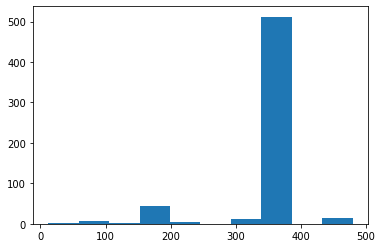

In [ ]:
plt.hist(train.Loan_Amount_Term)

In [ ]:
train.Loan_Amount_Term.mode()

0    360.0
dtype: float64

In [ ]:
train.Loan_Amount_Term.mean()

342.0

In [ ]:
train.Loan_Amount_Term.median()

360.0

**The Null values of Loan_Amount_Term will be substituted using the median of train set Loan_Amount_Term variable.**

In [ ]:
train.Loan_Amount_Term.fillna(train.Loan_Amount_Term.median(), inplace=True)
train.Loan_Amount_Term.value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

**Test set missing value imputation will be similar to the train set imputation.**

In [ ]:
test.Loan_Amount_Term.fillna(train.Loan_Amount_Term.median(), inplace=True)
test.Loan_Amount_Term.value_counts()

360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

### Gender NaN values imputation

In [ ]:
train.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
train[train['Gender'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,1.0,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [ ]:
train[train['Education']=='Graduate'][train['Married']=='Yes']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [ ]:
# Married and Graduate 
train[train['Education']=='Graduate'][train['Married']=='Yes']['Gender'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Male      275
Female     25
Name: Gender, dtype: int64

In [ ]:
# Married and Not Graduate
train[train['Education']=='Not Graduate'][train['Married']=='Yes']['Gender'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Male      82
Female     6
Name: Gender, dtype: int64

In [ ]:
# Not Married and Graduate 
train[train['Education']=='Graduate'][train['Married']=='No']['Gender'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Male      99
Female    66
Name: Gender, dtype: int64

**Most of the missing values under Gender are Married and Graduates and few Married Not Graduates and Not Married Graduates. There are more males than female in all these categories. Therefore missing values under Gender was imputed as 'Male'.**

In [ ]:
train.Gender.fillna('Male', inplace=True)
train.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [ ]:
test.Gender.isnull().sum()

11

**Test set Gender missing value imputation is also filled as 'Male'.**

In [ ]:
test.Gender.fillna('Male', inplace=True)

### Married NaN values imputation

In [ ]:
train[train['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,0,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,0,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,0,Graduate,No,10047,0.0,128.0,240.0,1.0,Semiurban,Y


In [ ]:
train[train['Gender']=='Male']['Married'].value_counts()

Yes    367
No     133
Name: Married, dtype: int64

In [ ]:
train[train['Gender']=='Male'][train['ApplicantIncome']>3000][train['ApplicantIncome']<5000]['Married'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Yes    134
No      54
Name: Married, dtype: int64

**There are more Married men than Unmarried men with an income between 3000 and 5000.**

In [ ]:
train[train['Gender']=='Female']['Married'].value_counts()

No     80
Yes    31
Name: Married, dtype: int64

In [ ]:
train[train['Gender']=='Female'][train['ApplicantIncome']>9000]['Married'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


No     7
Yes    4
Name: Married, dtype: int64

**There are more Unmarried Female than Married Female with Income greater than 9000**

**The 2 missing values for 'Married' variable, Male Gender will be filled as Yes and Female Gender as No**

In [ ]:
train.iloc[[104,228]] = train.iloc[[104,228]].fillna('Yes')
train.iloc[435] = train.iloc[435].fillna('No')

In [ ]:
train[train['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [ ]:
test[test.Married.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


**Test set Married column is free of missing values**

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

**Data set is free from NULL values**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

##Encoding

##Q5. 

Which type of encoding will be required to perform on the "Education" column?


**Because there are only 2 categories, Label encoding would be okay**

###Label encoding

In [ ]:
le = LabelEncoder()

In [ ]:
train.Gender = le.fit_transform(train.Gender)
test.Gender = le.fit_transform(test.Gender)

In [ ]:
train.Married = le.fit_transform(train.Married)
test.Married = le.fit_transform(test.Married)

In [ ]:
train.Education = le.fit_transform(train.Education)
test.Education = le.fit_transform(test.Education)

In [ ]:
train.Self_Employed = le.fit_transform(train.Self_Employed)
test.Self_Employed = le.fit_transform(test.Self_Employed)

In [ ]:
train.Property_Area = le.fit_transform(train.Property_Area)
test.Property_Area = le.fit_transform(test.Property_Area)

In [ ]:
train.Loan_Status = le.fit_transform(train.Loan_Status)

###Onehot encoding

In [ ]:
train.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
ohe = OneHotEncoder(sparse=False)

In [ ]:
new_Dependents = ohe.fit_transform(train[['Dependents']])

In [ ]:
new_Dependents

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [ ]:
train[['0_Dependents', '1_Dependent', '2_Dependents', '3+_Dependents']] = new_Dependents
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0_Dependents,1_Dependent,2_Dependents,3+_Dependents
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,1.0,0.0,0.0,0.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0.0,1.0,0.0,0.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1.0,0.0,0.0,0.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1.0,0.0,0.0,0.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1.0,0.0,0.0,0.0
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,0.0,0.0,1.0,0.0
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1,1.0,0.0,0.0,0.0
7,LP001014,1,1,3+,0,0,3036,2504.0,158.0,360.0,0.0,1,0,0.0,0.0,0.0,1.0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1,0.0,0.0,1.0,0.0
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0,0.0,1.0,0.0,0.0


In [ ]:
new_Dependents_test = ohe.fit_transform(test[['Dependents']])
new_Dependents_test

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [ ]:
test[['0_Dependents', '1_Dependent', '2_Dependents', '3+_Dependents']] = new_Dependents_test
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,0_Dependents,1_Dependent,2_Dependents,3+_Dependents
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,1.0,0.0,0.0,0.0
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,0.0,1.0,0.0,0.0
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,0.0,0.0,1.0,0.0
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,0.0,0.0,1.0,0.0
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,1.0,0.0,0.0,0.0


##Drop columns

* ID number is not important for the analysis. Therefore, Load_ID column can be removed. 
* 4 new columns were created for Dependents. So, the Dependents column can be removed. 

In [ ]:
train.drop(['Loan_ID', 'Dependents'], axis=1, inplace=True)

In [ ]:
test.drop(['Loan_ID', 'Dependents'], axis=1, inplace=True)

In [ ]:
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0_Dependents,1_Dependent,2_Dependents,3+_Dependents
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,1.0,0.0,0.0,0.0
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0.0,1.0,0.0,0.0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1,1.0,0.0,0.0,0.0
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1.0,0.0,0.0,0.0
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1.0,0.0,0.0,0.0


In [ ]:
test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,0_Dependents,1_Dependent,2_Dependents,3+_Dependents
0,1,1,0,0,5720,0,110.0,360.0,1.0,2,1.0,0.0,0.0,0.0
1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,0.0,1.0,0.0,0.0
2,1,1,0,0,5000,1800,208.0,360.0,1.0,2,0.0,0.0,1.0,0.0
3,1,1,0,0,2340,2546,100.0,360.0,1.0,2,0.0,0.0,1.0,0.0
4,1,0,1,0,3276,0,78.0,360.0,1.0,2,1.0,0.0,0.0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  0_Dependents       614 non-null    float64
 12  1_Dependent        614 non-null    float64
 13  2_Dependents       614 non-null    float64
 14  3+_Dependents      614 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 72.1 KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int64  
 1   Married            367 non-null    int64  
 2   Education          367 non-null    int64  
 3   Self_Employed      367 non-null    int64  
 4   ApplicantIncome    367 non-null    int64  
 5   CoapplicantIncome  367 non-null    int64  
 6   LoanAmount         367 non-null    float64
 7   Loan_Amount_Term   367 non-null    float64
 8   Credit_History     367 non-null    float64
 9   Property_Area      367 non-null    int64  
 10  0_Dependents       367 non-null    float64
 11  1_Dependent        367 non-null    float64
 12  2_Dependents       367 non-null    float64
 13  3+_Dependents      367 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 40.3 KB


#Data transformation and remove outliers

Log transformation reduces the range and outliers. 

In [ ]:
train.ApplicantIncome = np.log(train.ApplicantIncome + 2)
train.LoanAmount = np.log(train.LoanAmount + 2)

# 2 has been added to make sure that there will not be any issue in log transfering if ApplicantIncome or LoanAmount is 0. 
#   Because log(0) is not defined. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


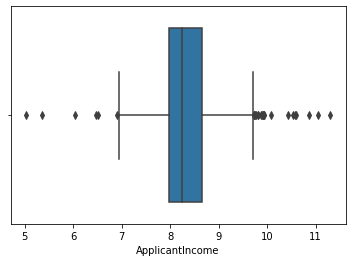

In [ ]:
sns.boxplot(train.ApplicantIncome)

In [ ]:
# outliers
train.ApplicantIncome.nsmallest(3)

216    5.023881
468    5.356586
600    6.035481
Name: ApplicantIncome, dtype: float64

In [ ]:
# outliers
train.ApplicantIncome.nlargest(3)

409    11.302229
333    11.056257
171    10.854470
Name: ApplicantIncome, dtype: float64

In [ ]:
# remove outliers because it affects the training 
train.drop([216, 468, 600, 409, 333, 171], axis=0, inplace=True)

In [ ]:
# index should be reset back because rows were dropped
train = train.reset_index()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


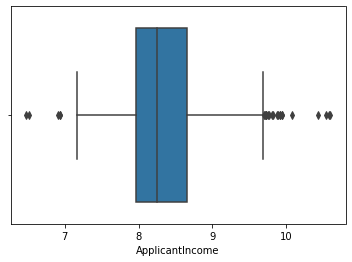

In [ ]:
sns.boxplot(train.ApplicantIncome)

**Less outliers. All the outliers cannot be removed because we clearly do not know whether they are unusual points. Therefore, much deviated points were only removed.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


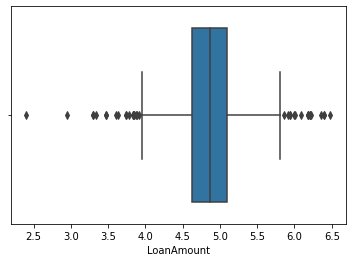

In [ ]:
sns.boxplot(train.LoanAmount)

In [ ]:
# outliers
train.LoanAmount.nsmallest(2)

563    2.397895
14     2.944439
Name: LoanAmount, dtype: float64

In [ ]:
# drop 2 outliers
train.drop([563, 14], axis=0, inplace=True)

In [ ]:
train = train.reset_index()
train.head()

,level_0,index,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0_Dependents,1_Dependent,2_Dependents,3+_Dependents
0,0,0,1,0,0,0,8.674368,0.0,4.867534,360.0,1.0,2,1,1.0,0.0,0.0,0.0
1,1,1,1,1,0,0,8.430545,1508.0,4.867534,360.0,1.0,0,0,0.0,1.0,0.0,0.0
2,2,2,1,1,0,1,8.007034,0.0,4.219508,360.0,1.0,2,1,1.0,0.0,0.0,0.0
3,3,3,1,1,1,0,7.857481,2358.0,4.804021,360.0,1.0,2,1,1.0,0.0,0.0,0.0
4,4,4,1,0,0,0,8.699848,0.0,4.962845,360.0,1.0,2,1,1.0,0.0,0.0,0.0


In [ ]:
train.drop(['level_0', 'index'], axis=1, inplace=True)

In [ ]:
# Resetted Train set without few outliers 
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,0_Dependents,1_Dependent,2_Dependents,3+_Dependents
0,1,0,0,0,8.674368,0.0,4.867534,360.0,1.0,2,1,1.0,0.0,0.0,0.0
1,1,1,0,0,8.430545,1508.0,4.867534,360.0,1.0,0,0,0.0,1.0,0.0,0.0
2,1,1,0,1,8.007034,0.0,4.219508,360.0,1.0,2,1,1.0,0.0,0.0,0.0
3,1,1,1,0,7.857481,2358.0,4.804021,360.0,1.0,2,1,1.0,0.0,0.0,0.0
4,1,0,0,0,8.699848,0.0,4.962845,360.0,1.0,2,1,1.0,0.0,0.0,0.0


In [ ]:
train.shape

(606, 15)

In [ ]:
# Test set log transformation to test the model
test.ApplicantIncome = np.log(test.ApplicantIncome + 2)
test.LoanAmount = np.log(test.LoanAmount + 2)

##Feature selection

In [ ]:
feature = ExtraTreesClassifier(random_state=42)

In [ ]:
x = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

In [ ]:
feature.fit(x,y)

ExtraTreesClassifier(random_state=42)

In [ ]:
feature.feature_importances_

array([0.02326738, 0.01970073, 0.02480879, 0.02507309, 0.19103666,
       0.11518697, 0.17843834, 0.04858048, 0.27339469, 0.05532749,
       0.01429225, 0.01323155, 0.00922492, 0.00843667])

In [ ]:
important_features = pd.Series(feature.feature_importances_, index = x.columns)
important_features

Gender               0.023267
Married              0.019701
Education            0.024809
Self_Employed        0.025073
ApplicantIncome      0.191037
CoapplicantIncome    0.115187
LoanAmount           0.178438
Loan_Amount_Term     0.048580
Credit_History       0.273395
Property_Area        0.055327
0_Dependents         0.014292
1_Dependent          0.013232
2_Dependents         0.009225
3+_Dependents        0.008437
dtype: float64

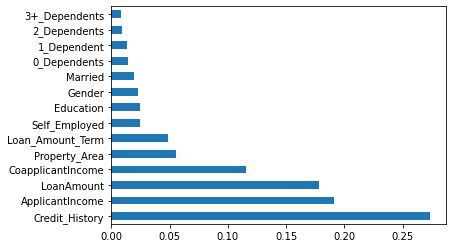

In [ ]:
important_features.nlargest(14).plot(kind='barh')

##Q8.
8. What all features are you going to consider for the model training and why? (Give the appropriate reason for 
choosing such features among others)


**Dependents are less important compared to other features. Therefore, 0, 1, 2 and 3+ dependents columns (original Dependent column) are dropped for further analysis**

In [ ]:
new_x = train[list(important_features.nlargest(10).index)]
new_x

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Property_Area,Loan_Amount_Term,Self_Employed,Education,Gender,Married
0,1.0,8.674368,4.867534,0.0,2,360.0,0,0,1,0
1,1.0,8.430545,4.867534,1508.0,0,360.0,0,0,1,1
2,1.0,8.007034,4.219508,0.0,2,360.0,1,0,1,1
3,1.0,7.857481,4.804021,2358.0,2,360.0,0,1,1,1
4,1.0,8.699848,4.962845,0.0,2,360.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
601,1.0,7.973155,4.290459,0.0,0,360.0,0,0,0,0
602,1.0,8.320692,3.737670,0.0,0,180.0,0,0,1,1
603,1.0,8.996404,5.541264,240.0,2,360.0,0,0,1,1
604,1.0,8.933928,5.241747,0.0,2,360.0,0,0,1,1


##Model building

In [ ]:
test.drop(['0_Dependents', '1_Dependent', '2_Dependents', '3+_Dependents'], axis=1, inplace=True)
test_features = ['Credit_History',	'ApplicantIncome'	,'LoanAmount'	,'CoapplicantIncome'	,'Property_Area',	'Loan_Amount_Term',
                 'Self_Employed','Education',	'Gender'	,	'Married']
test = test[test_features]

In [ ]:
test.head()

,Credit_History,ApplicantIncome,LoanAmount,CoapplicantIncome,Property_Area,Loan_Amount_Term,Self_Employed,Education,Gender,Married
0,1.0,8.652074,4.718499,0,2,360.0,0,0,1,1
1,1.0,8.032035,4.852030,1500,2,360.0,0,0,1,1
2,1.0,8.517593,5.347108,1800,2,360.0,0,0,1,1
3,1.0,7.758761,4.624973,2546,2,360.0,0,0,1,1
4,1.0,8.094989,4.382027,0,2,360.0,0,1,1,0


In [ ]:
x_train = new_x
y_train = y

x_test = test

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(new_x, y, test_size=0.2, random_state=42)

###Naive Bayes Classifier

In [ ]:
nb_model = GaussianNB()

In [ ]:
# training phase 
nb_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
# predictions on test set
nb_test_pred = nb_model.predict(x_test)

In [ ]:
# predictions on train set
nb_train_pred = nb_model.predict(x_train)

**Accuracy was checked using the training set because the actual test set target variable (y_test) is not given.**

In [ ]:
# Accuracy of the Naive Bayes model using the train set
score_nb = nb_model.score(x_train, y_train)
print('accuracy :', score_nb)
nb = round(score_nb*100,2)
print('accuracy % :', nb)

accuracy : 0.806930693069307
accuracy % : 80.69


###Support vector classifier

In [ ]:
svc_model = SVC()

In [ ]:
# training phase 
svc_model.fit(x_train, y_train)

SVC()

In [ ]:
# predictions on test set
svc_test_pred = svc_model.predict(x_test)

In [ ]:
# predictions on train set
svc_train_pred = svc_model.predict(x_train)

In [ ]:
# Accuracy of the Support vector classifier model using the train set
svc_accuracy = accuracy_score(y_train, svc_train_pred)
svc = round(svc_accuracy*100, 2)
svc

69.47

In [ ]:
# svc = pd.DataFrame({'Actual':y_train, 'Predicted':svc_train_pred})
# sns.heatmap(svc.corr(), annot=True, cmap='Greens')

In [ ]:
########## without considering xtest
# svc_accuracy = accuracy_score(y_test, svc_pred)
# svc_accuracy

###Logistic regression

In [ ]:
lor_model = LogisticRegression()

In [ ]:
# training phase 
lor_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# predictions on test set
lor_test_pred = lor_model.predict(x_test)

In [ ]:
# predictions on train set
lor_train_pred = lor_model.predict(x_train)

In [ ]:
# Accuracy of the Logistic regression model using the train set
lor_accuracy = accuracy_score(y_train, lor_train_pred)
lor = round(lor_accuracy*100, 2)
lor

81.35

In [ ]:
########## without considering xtest
# lor_accuracy = accuracy_score(y_test, lor_pred)
# lor_accuracy

0.7886178861788617

In [ ]:
# lor = pd.DataFrame({'Actual':y_train, 'Predicted':lor_train_pred})
# sns.heatmap(lor.corr(), annot=True, cmap='Greens')

###Decision tree classifier

##Q10.
10. Have you performed the Hyper Parameter Tuning?

**yes**

####Hyper parameter tunning

In [ ]:
# The function to measure the quality of a split
criterion = ["gini", "entropy"]

# The number of features to consider when looking for the best split
max_features = ['auto', 'sqrt']

# The maximum depth of the tree
max_depth = [i for i in range(5, 55, 5)]

# The minimum number of samples required to split an internal node
min_samples_split = [2, 5, 10, 30, 100]

# The minimum number of samples required to be at a leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
param_grid = {'criterion': criterion,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}
param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 30, 100]}

In [ ]:
dc_model = DecisionTreeClassifier(random_state = 42)

In [ ]:
dc_gridCV = GridSearchCV(estimator = dc_model, param_grid = param_grid, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
# training phase 
dc_gridCV.fit(x_train, y_train)

Fitting 4 folds for each of 800 candidates, totalling 3200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 30, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
dc_gridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [ ]:
##############################################################
# dc_gridCV = DecisionTreeClassifier(criterion='entropy', max_depth = 5, max_features = 'auto', min_samples_split = 5, 
#                                    min_samples_leaf = 1, random_state = 42)

In [ ]:
##########################################
# dc_gridCV.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_split=10,
                       random_state=42)

In [ ]:
# predictions on test set
dc_test_pred = dc_gridCV.predict(x_test)

In [ ]:
# predictions on train set
dc_train_pred = dc_gridCV.predict(x_train)

In [ ]:
# Accuracy of Decision tree classifier model using train set
dc_accuracy = accuracy_score(y_train, dc_train_pred)
dc = round(dc_accuracy*100, 2)
dc

79.87

In [ ]:
########## without considering xtest
# dc_accuracy = accuracy_score(y_test, dc_pred)
# dc_accuracy

In [ ]:
# dc = pd.DataFrame({'Actual':y_train, 'Predicted':dc_train_pred})
# sns.heatmap(dc.corr(), annot=True, cmap='Greens')

###Random forest classifier

####Hyper parameter tunning

In [ ]:
# The number of trees in the forest
n_estimators = [int(i) for i in range(100, 501, 100)]

# The number of features to consider when looking for the best split
max_features = ['auto', 'sqrt']

# The maximum depth of the tree
max_depth = [2, 3, 5, 10, 20]

# The minimum number of samples required to be at a leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_leaf': min_samples_leaf}
param_grid

{'max_depth': [2, 3, 5, 10, 20],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500]}

In [ ]:
rf_model = RandomForestClassifier(random_state = 42)

In [ ]:
rf_gridCV = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring = 'neg_mean_squared_error', n_jobs = 1, verbose=2, cv=5)

In [ ]:
# training phase 
rf_gridCV.fit(x_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=100; total time=   0.1s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_leaf=1, n_estimators=200; total time=   0.3s
[CV] END max_depth=2, max_features=auto, min_samples_l

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
rf_gridCV.best_params_

{'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [ ]:
#####################################################
# rf_gridCV = RandomForestClassifier(n_estimators = 100, max_depth = 2, min_samples_leaf = 1, max_features = 'auto', random_state = 42)

In [ ]:
#######################################################
# rf_gridCV.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=5, random_state=42)

In [ ]:
# predictions on test set
rf_test_pred = rf_gridCV.predict(x_test)

In [ ]:
# predictions on train set
rf_train_pred = rf_gridCV.predict(x_train)

In [ ]:
# accuracy of Random forest classifier model using train set
rf_accuracy = accuracy_score(y_train, rf_train_pred)
rf = round(rf_accuracy*100, 2)
rf

81.19

In [ ]:
# without considering test set 
# rf_accuracy = accuracy_score(y_test, rf_pred)
# rf_accuracy

In [ ]:
# rf_df = pd.DataFrame({'Actual':y_train, 'Predicted':rf_train_pred})
# sns.heatmap(rf_df.corr(), annot=True, cmap='Greens')

##Q9.
9. Which model are you going to choose and define the reason for going with the same model?

* lor <- 81.35%
* rf <- 81.19%
* nb <- 80.69%
* dc <- 79.87%
* svc <- 69.47%

**Logistic regression model gives the best model with the highest accuracy of 81.35%. Overall all the models are giving an accuracy closer to 70%.**

##Q12.
12. What's the accuracy of your model?

> 0.8135313531353136


##Q11.
11. Compare the Actual results with the Predicted results

**The actual values of the target variable is not given in the test set. Therefore, the predicted test values cannot be compared with its actual ones.**

**Instead, the training set values can be compared.**

In [ ]:
# Actual Vs Predicted comparison
lor_df = pd.DataFrame({'Actual':y_train, 'Predicted':lor_train_pred})
lor_df.head(10)

,Actual,Predicted
0,1,1
1,0,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,0,0
8,1,1
9,0,1


In [ ]:
# The predicted values of the test set
lor_test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

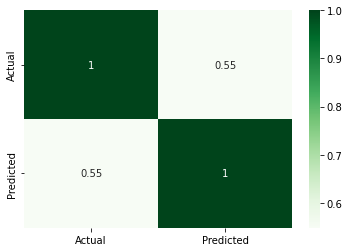

In [ ]:
sns.heatmap(lor_df.corr(), annot=True, cmap='Greens')

**Correlation between actual and predicted is not very close to 1. But it gives a correlation of 0.55 (55%).**

##Q13.
13. In order to improve the accuracy, what more approaches can be done?

* Remove or substitute an appropriate value for outliers.
* Collect more data. Because 600+ data points are not sufficient to build an accurate model.
* Increasing the number of parameters in hyperparameter tunning.



In [ ]:
######################################################################################## fill

##Q14.
14. What can you conclude with respect to the data?

* Most of the loan status has been disproved when the credit history does not meet the guidelines. 


#Pickle

In [ ]:
import pickle